In [1]:
import pandas as pd
import requests
import geopandas as gpd
from shapely.geometry import shape
import contextily as ctx
import matplotlib.pyplot as plt


Bad key text.latex.unicode in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplo

In [4]:
data = pd.read_excel("Areas con prioridad peatonal.xlsx")

In [5]:
from shapely import wkt
data['geometry'] = data['geometry'].apply(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(data, crs=crs, geometry='geometry')
gdf = gdf.to_crs(epsg=3857)

C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
gdf.dtypes

Lugar            object
Lon             float64
Lat             float64
Foto             object
Descripción      object
Obras            object
geometry       geometry
dtype: object

C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


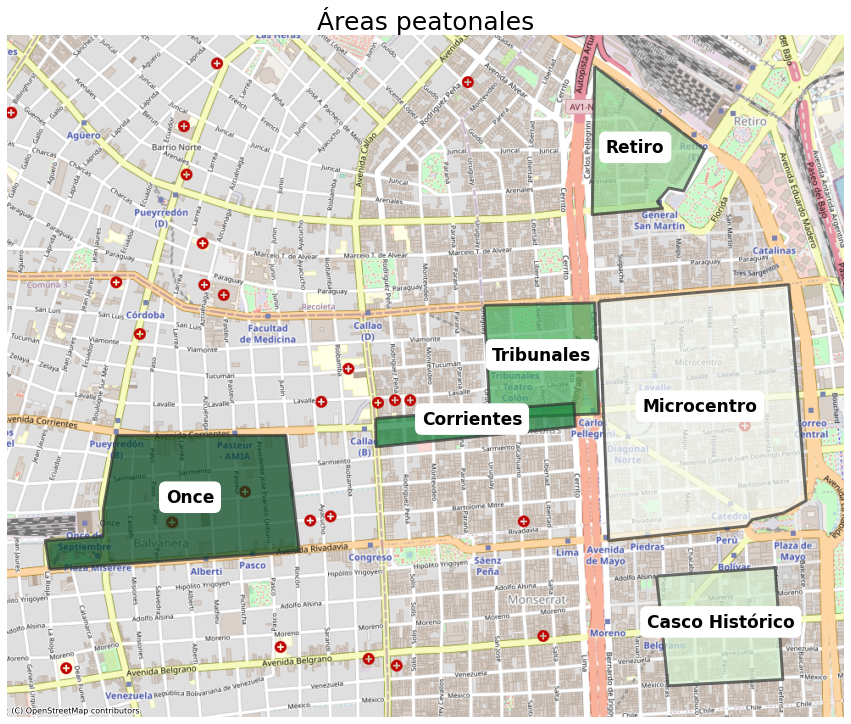

In [7]:
import contextily as ctx
import matplotlib.pyplot as plt

ax = gdf.plot(figsize=(15, 15),alpha=0.7,  cmap = plt.get_cmap('Greens'), legend = 'Áreas peatonales',edgecolor="#333",linewidth=3)
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Áreas peatonales',fontsize=25)
gdf.apply(lambda x: ax.annotate(s=x.Lugar, xy=x.geometry.centroid.coords[0],size=17,weight='bold', ha='center',bbox={'boxstyle':"round",'facecolor': 'white', 'alpha':1, 'pad': 0.4, 'edgecolor':'none'}),axis=1);
ax.set_axis_off()
# plt.savefig('peatonales.jpg')